In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def get_random_points(num, low, high):
    x,y = (high-low) * np.random.random(size=(2,num)) + low
    return x,y

In [14]:
x,y=get_random_points(20,-1,1)

In [15]:
hull_x = [-1, 1, 1, -1]
hull_y = [1, 1, -1, -1]

In [25]:
def plot_points(x,y):
    for i in range(0, len(x)):
        plt.plot(x[i], y[i], 'ro-')


[-1, 1, 1, -1, -1] [1, 1, -1, -1, 1]


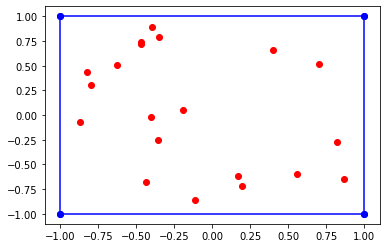

In [43]:
def plot_hull(x,y):
    x = x.copy()
    y = y.copy()
    
    x.append(x[0])
    y.append(y[0])
    print(x,y)
    for i in range(0, len(x)-1):
        plt.plot(x[i:i+2], y[i:i+2], 'bo-')
plot_hull(hull_x, hull_y)
plot_points(x,y)

[-1, 1, 1, -1, -1, -1] [1, 1, -1, -1, 1, 1]


False

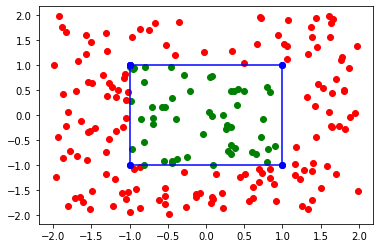

In [64]:
def verify_points(hull_x, hull_y, x, y, plot_graph=True):
    
    hull_x = hull_x.copy()
    hull_y = hull_y.copy()
    
    hull_x.append(hull_x[0])
    hull_y.append(hull_y[0])
    
    total_failed = 0
    
    for i in range(len(x)):
        failed = 0
        for j in range(len(hull_x) - 1):
            base_hull = (hull_x[j], hull_y[j])
            next_hull = (hull_x[j+1], hull_y[j+1])
            
            
            vec_to_pos = np.array([x[i] - base_hull[0], y[i] - base_hull[1]])
            vec_to_hull = np.array([next_hull[0] - base_hull[0], next_hull[1] - base_hull[1]])
            
            #Not in polygon
            if (np.cross(vec_to_hull, vec_to_pos) >= 0):
                failed = 1
                break
        
        if (plot_graph):
            if (failed == 1):
                plt.plot(x[i], y[i], 'ro-')
            else:
                plt.plot(x[i], y[i], 'go-')
        total_failed += failed
        
    if (plot_graph):
        plot_hull(hull_x, hull_y)
    return failed == 0
verify_points(hull_x, hull_y, x, y)

[-1, 1, 1, -1, -1, -1] [1, 1, -1, -1, 1, 1]


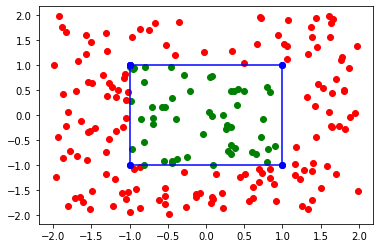

In [62]:
x,y = get_random_points(200,-2,2)
verify_points(hull_x, hull_y, x, y)

[1, 0, -1, 0, 1, 1] [0, -1, 0, 1, 0, 0]


False

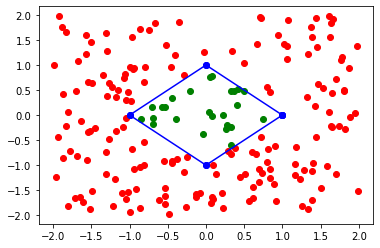

In [66]:
hull_x = [1,0,-1,0]
hull_y = [0,-1,0,1]

verify_points(hull_x, hull_y, x, y)

[1, -0.3, -0.5, -0.7, 0, 1, 1] [0.1, -1.1, -0.8, 1.5, 1, 0.1, 0.1]


False

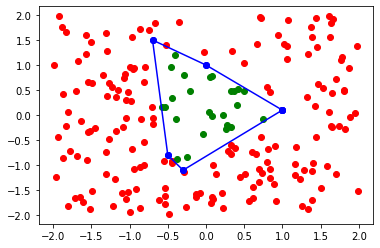

In [69]:
hull_x = [1,-0.3,-0.5,-0.7,0]
hull_y = [0.1,-1.1, -0.8,1.5,1]

verify_points(hull_x, hull_y, x, y)